In [ ]:
!git clone https://github.com/eliaslimmer/simple-NN-in-numpy.git
!import sys
!sys.path.append("/content/simple-NN-in-numpy")

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
import sys
sys.path.append("/Users/entertainement/Documents/Projects/simple-NN-in-numpy")

In [3]:
from model.neural_net import Neural_Network
from utils.logger import TrainingLogger
from utils.metrics import cross_entropy_loss, accuracy

In [4]:
from utils.train import train

## Download dataset

I'll be using the MNIST dataset here.

In [5]:
with np.load("/Users/entertainement/Documents/Projects/simple-NN-in-numpy/data/mnist.npz") as data:
    x_train = data["x_train"]
    y_train = data["y_train"]
    x_test = data["x_test"]
    y_test = data["y_test"]

In [6]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

ModuleNotFoundError: No module named 'keras'

some examples:

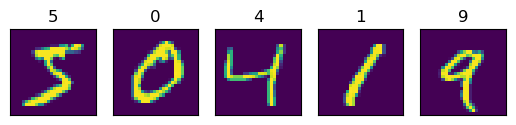

In [7]:
for i, (img, y) in enumerate(zip(x_train[:5].reshape(5, 28, 28), y_train[:5])):
    plt.subplot(151 + i)
    plt.imshow(img)
    plt.xticks([])
    plt.yticks([])
    plt.title(y)

In [8]:
x_train.shape

(60000, 28, 28)

In [9]:
X_train = x_train.reshape(60000, -1).T / 255.0

In [10]:
Y_train = np.zeros((10, y_train.size))
Y_train[y_train, np.arange(y_train.size)] = 1

In [11]:
X_test = x_test.reshape(10000, -1).T / 255.0

Y_test = np.zeros((10, y_test.size))
Y_test[y_test, np.arange(y_test.size)] = 1

## Training

In [12]:
network = Neural_Network(input_layer_size=784, output_layer_size=10, hidden_layer_size=256)
logger = TrainingLogger()

In [ ]:
train(network, X_train, Y_train, X_test, Y_test, logger, epochs=100, log_every=1)

[Epoch 0] Loss: 2.3029 | Train Acc: 9.69% | Test Acc: 13.90%
[Epoch 1] Loss: 2.3007 | Train Acc: 13.83% | Test Acc: 20.14%
[Epoch 2] Loss: 2.2984 | Train Acc: 19.56% | Test Acc: 26.04%
[Epoch 3] Loss: 2.2962 | Train Acc: 24.82% | Test Acc: 30.62%
[Epoch 4] Loss: 2.2938 | Train Acc: 29.32% | Test Acc: 34.60%
[Epoch 5] Loss: 2.2915 | Train Acc: 33.47% | Test Acc: 38.95%
[Epoch 6] Loss: 2.2890 | Train Acc: 37.81% | Test Acc: 43.04%
[Epoch 7] Loss: 2.2864 | Train Acc: 41.97% | Test Acc: 45.98%
[Epoch 8] Loss: 2.2837 | Train Acc: 44.97% | Test Acc: 47.89%
[Epoch 9] Loss: 2.2808 | Train Acc: 47.27% | Test Acc: 49.59%
[Epoch 10] Loss: 2.2778 | Train Acc: 48.93% | Test Acc: 50.68%
[Epoch 11] Loss: 2.2746 | Train Acc: 50.25% | Test Acc: 51.71%
[Epoch 12] Loss: 2.2712 | Train Acc: 51.35% | Test Acc: 52.81%
[Epoch 13] Loss: 2.2675 | Train Acc: 52.35% | Test Acc: 53.59%
[Epoch 14] Loss: 2.2636 | Train Acc: 53.04% | Test Acc: 54.03%
[Epoch 15] Loss: 2.2594 | Train Acc: 53.67% | Test Acc: 54.51%
[Ep

## Evaluation

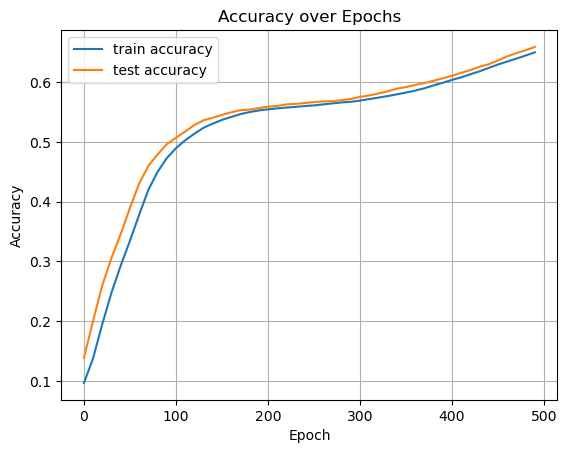

In [14]:
logger.plot_accuracies()

plot some of the misclassified numbers:

In [16]:
A2_test = network.forward(X_test)

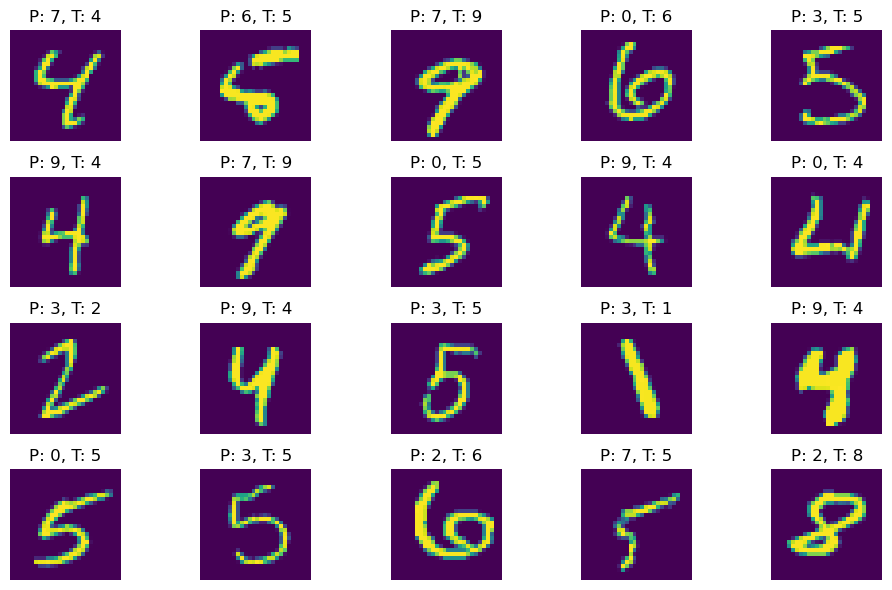

In [17]:
total = 20

misclassified = []

for i in range(A2_test.shape[1]):
  pred = np.argmax(A2_test[:, i])
  true = y_test[i]

  if pred != true:
    img = x_test[i].reshape(28, 28)
    misclassified.append((img, pred, true))

    if len(misclassified) == total:
      break

cols = 5
rows = total // cols + (total % cols > 0)
fig, axes = plt.subplots(rows, cols, figsize=(10, 6))

for idx, (img, pred, true) in enumerate(misclassified):
    ax = axes[idx // cols, idx % cols]
    ax.imshow(img)
    ax.set_title(f"P: {pred}, T: {true}")
    ax.axis('off')

# Hide any unused subplots
for j in range(len(misclassified), rows * cols):
    fig.delaxes(axes[j // cols, j % cols])

plt.tight_layout()
plt.show()